In [1]:
%cd /home/neunna/workspace/nextclade_a71/
import pandas as pd
import numpy as np
from Bio import Phylo
from Bio.Phylo.BaseTree import Clade
import pandas as pd
from collections import defaultdict
import ipdb
from copy import deepcopy
import matplotlib.pyplot as plt
import sys
from Bio.Phylo import draw

tree = Phylo.read("results/star_tree.nwk", "newick")
df = pd.read_csv('results/filtered_metadata.tsv', sep='\t')
clade = pd.read_csv('resources/clade_map.tsv', sep='\t')

/home/neunna/workspace/nextclade_a71


In [2]:
def assign_group(clade):
    if clade.startswith("B"):
        return "B"
    elif clade == "C2.r":
        return "C2.r"
    elif clade == "C1-like":
        return "C1-like"
    elif clade.startswith("C"):
        return "C"
    # elif clade.startswith("A"):
    #     return "A"
    else:
        return "A/E/F"

clade["group"] = clade["clade"].apply(assign_group)

In [3]:
dfn = df.merge(clade, how='left', on='accession')
dfn["date"]=dfn["date"].replace("XXXX-XX-XX", np.nan)
dfn["collection_date"]=dfn["collection_date"].replace("XXXX-XX-XX", np.nan)

In [4]:
dfn.date = dfn.date.str.replace("-XX", "")
dfn.collection_date = dfn.collection_date.str.replace("-XX", "")

In [5]:
# replace date with collection date if collection date is longer
if pd.isna(dfn.date).any():
    dfn.date = dfn.date.fillna(dfn.collection_date)
elif len(dfn.date) < len(dfn.collection_date)  & pd.notna(dfn.collection_date).any():
    dfn.date = dfn.collection_date

In [6]:
dfn=dfn.loc[pd.notna(dfn['clade_y']), ['accession', 'date', 'group']]
dfn.columns=['tip','date','group']
dfn

,tip,date,group
112,KX893543,2015-04-10,C
227,KY014078,2008-09-10,C
228,KY014079,2008-09-10,C
229,KY014080,2008-11-17,C
237,KY074643,2008,C
...,...,...,...
14411,JN020147,2011-04,C
14413,JN052925,2011-04,C
14471,JN230523,2009-04,C
14675,JN544418,1998-04-27,C


In [7]:
dfn.to_csv("results/clockor_dates.csv",index=False)

In [17]:
# replace the tip names with the tip_date_group of the dfn dataframe
for terminal in tree.get_terminals():
    tip_name = terminal.name
    matching_row = dfn[dfn['tip'] == tip_name]
    if not matching_row.empty:
        terminal.name = f"{tip_name}_{matching_row['date'].values[0]}_{matching_row['group'].values[0]}"

In [18]:
## list the tree labels
tree.get_terminals()

[Clade(branch_length=0.00842, name='AB575912_1966-XX-XX_B'),
 Clade(branch_length=0.00318, name='AB575911_1966-XX-XX_B'),
 Clade(branch_length=0.00561, name='MT188611_1997-XX-XX_B3'),
 Clade(branch_length=0.0087, name='DQ341354_XXXX-XX-XX_B3'),
 Clade(branch_length=0.00279, name='DQ341367_XXXX-XX-XX_B3'),
 Clade(branch_length=0.0036, name='AM396588_XXXX-XX-XX_B3'),
 Clade(branch_length=0.00081, name='AB469183_XXXX-XX-XX_B3'),
 Clade(branch_length=0.0, name='AB550334_XXXX-XX-XX_B3'),
 Clade(branch_length=0.0, name='AB469182_XXXX-XX-XX_B3'),
 Clade(branch_length=0.00297, name='AM396586_XXXX-XX-XX_B3'),
 Clade(branch_length=0.00014, name='EU376004_XXXX-XX-XX_B3'),
 Clade(branch_length=0.00041, name='EU364841_XXXX-XX-XX_B3'),
 Clade(branch_length=0.00295, name='AB575928_1986-XX-XX_B2'),
 Clade(branch_length=0.00352, name='AB575927_1986-XX-XX_B2'),
 Clade(branch_length=0.01749, name='AB575923_1983-XX-XX_B2'),
 Clade(branch_length=0.00743, name='U22522_XXXX-XX-XX_B2'),
 Clade(branch_length=0

In [19]:
# save the tree to results as tree_clockor2.nwk
Phylo.write(tree, "results/tree_clockor2.nwk", "newick")

1

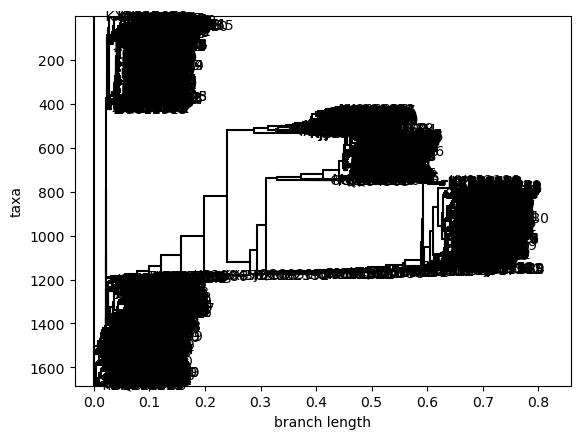

In [123]:
from Bio.Phylo import draw

Phylo.draw(tree, do_show=True, label_func=lambda x: x.name if x.name else ""
)